In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [12]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [13]:
#implementing random value imputation:-

age_non_null = X_train['Age'].dropna() #all non null values of age column

n_missing = X_train['Age'].isnull().sum() #total missing values

#for n missing values, there will be n random numbers generated from the age_non_null
random_ages = np.random.choice(age_non_null, size=n_missing, replace=True)

X_train['imputed_age'] = X_train['Age'].copy()# new column created which initially is same as age (having missing values)

X_train.loc[X_train['imputed_age'].isnull(), 'imputed_age'] = random_ages #in place of all missing values, values of random_ages is put.

In [14]:
X_train.head()

,Age,Fare,imputed_age
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


<ipython-input-15-001239dca04f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-15-001239dca04f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['imputed_age'],label = 'Imputed',hist=False)


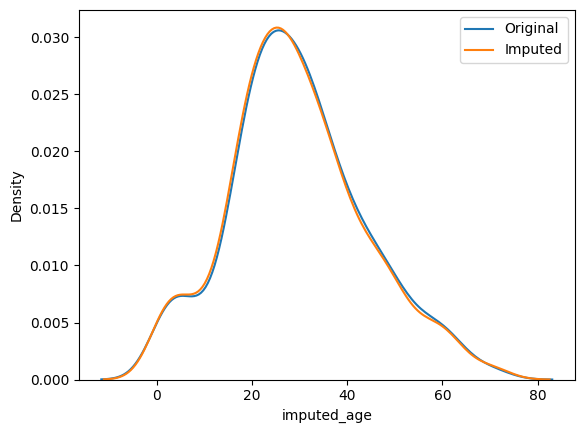

In [15]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['imputed_age'],label = 'Imputed',hist=False)

plt.legend()
plt.show()
'''
below, you can see that there is no change in the distribution of the data, proving that data was MCAR, and random imputation was a safe
choice. moreover, the distribution is preserved.
'''

In [17]:
#almost the same, proving that variance too is preserved.

print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['imputed_age'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  204.65850231751432


<Axes: >

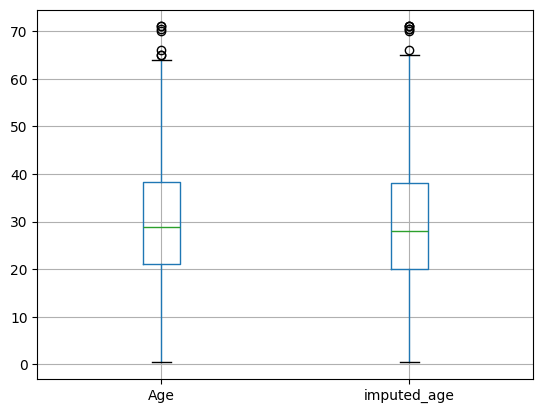

In [18]:
# no change in the outliers, because the spread is still the same, and has not shrinked. if the spread had shrinked, the values at the end of
#the distribution had been discarded out of the distribution making them outliers.
X_train[['Age', 'imputed_age']].boxplot()

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [23]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train

,FireplaceQu,GarageQual
455,TA,TA
863,NaN,TA
504,Fa,TA
1413,Gd,TA
1389,Gd,TA
...,...,...
466,Po,TA
299,Gd,TA
493,Fa,TA
527,Gd,TA


In [24]:
GarageQual_non_null = X_train['GarageQual'].dropna()

n_missing = X_train['GarageQual'].isnull().sum()

random_GarageQual = np.random.choice(GarageQual_non_null, size=n_missing, replace=True)

X_train['imputed_GarageQual'] = X_train['GarageQual'].copy()

X_train.loc[X_train['imputed_GarageQual'].isnull(), 'imputed_GarageQual'] = random_GarageQual

In [25]:
X_train.sample(5)

,FireplaceQu,GarageQual,imputed_GarageQual
894,NaN,TA,TA
870,NaN,TA,TA
313,Gd,TA,TA
1427,TA,TA,TA
480,Gd,TA,TA


In [27]:
FireplaceQu_non_null = X_train['FireplaceQu'].dropna()

n_missing = X_train['FireplaceQu'].isnull().sum()

random_FireplaceQu = np.random.choice(FireplaceQu_non_null, size=n_missing, replace=True)

X_train['imputed_FireplaceQu'] = X_train['FireplaceQu'].copy()

X_train.loc[X_train['imputed_FireplaceQu'].isnull(), 'imputed_FireplaceQu'] = random_FireplaceQu

In [28]:
X_train.sample(5)

,FireplaceQu,GarageQual,imputed_GarageQual,imputed_FireplaceQu
39,NaN,NaN,TA,TA
5,NaN,TA,TA,TA
1420,TA,TA,TA,TA
110,NaN,TA,TA,Gd
879,NaN,TA,TA,Ex


In [29]:
'''
as they are categorical, we can't plot the kde graphs. instead, we look if the initial ratio of categories of non missing values of the
this category = GarageQual to the total non missing values is same as ratio of these categories (now having 0 missing values) to total
values is the same or not.
if same, then the distribution of this column is same, and we will still receive consistent patterns (data pattern before and after the
imputation is the SAME.)
'''

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['imputed_GarageQual'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035103
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [30]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['imputed_FireplaceQu'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.488870
TA,0.412439,0.412671
Fa,0.040917,0.042808
Po,0.027823,0.027397
Ex,0.024550,0.028253
